In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-resources-data-set/HRDataset_v14.csv


# import packages


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from math import sqrt
import statsmodels.api as sm
import os
import math
from datetime import datetime
from datetime import timedelta
import plotly.express as px


In [3]:
df=pd.read_csv('../input/human-resources-data-set/HRDataset_v14.csv')

# explore the data

In [4]:
df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df.columns


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

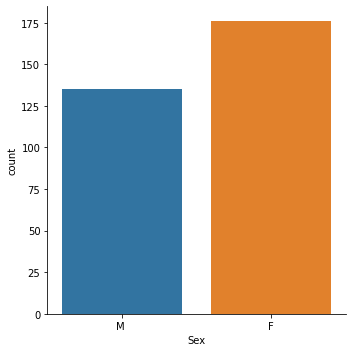

In [6]:
sns.catplot(x='Sex',kind='count',data=df)

**most of emp is female**

**let's see which department is the bigger In terms of Employees**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Production       '),
  Text(1, 0, 'IT/IS'),
  Text(2, 0, 'Software Engineering'),
  Text(3, 0, 'Admin Offices'),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Executive Office')])

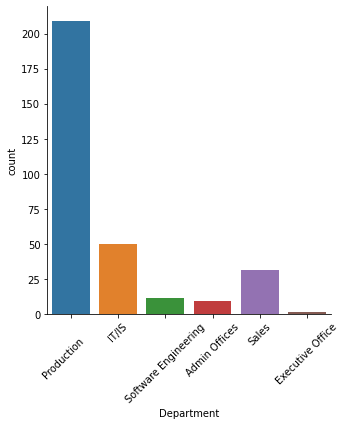

In [7]:
sns.catplot(x= 'Department',kind='count',data=df)
plt.xticks(rotation=45)


**production is the bigger**


**now we want to know what is the most PerformanceScore of employees**

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Exceeds'),
  Text(1, 0, 'Fully Meets'),
  Text(2, 0, 'Needs Improvement'),
  Text(3, 0, 'PIP')])

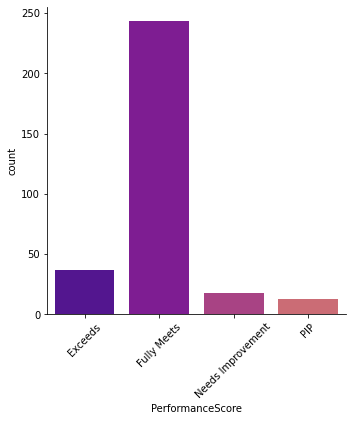

In [8]:
color_palette = sns.color_palette("plasma")
sns.set_palette(color_palette)
sns.catplot(x = "PerformanceScore",kind='count', data = df)
plt.xticks(rotation=45)



**let's see What is the overall diversity profile of the organization**


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Two or more races'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'American Indian or Alaska Native'),
  Text(5, 0, 'Hispanic')])

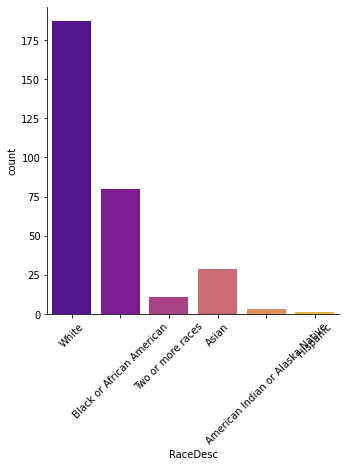

In [9]:
sns.catplot(x= 'RaceDesc',kind='count',data=df)
plt.xticks(rotation=45)


# **now let's make deeper analysis** 

 **want to know PerformanceScore In terms of each Department**

In [10]:
fig = px.bar(df, x="Department",  color="PerformanceScore" )
 
fig.show()

**Let's see if EmpSatisfaction influence on PerformanceScore**

In [11]:
b=df.groupby('PerformanceScore')['EmpSatisfaction'].mean().reset_index()
b

,PerformanceScore,EmpSatisfaction
0,Exceeds,4.108108
1,Fully Meets,3.950617
2,Needs Improvement,3.611111
3,PIP,2.538462


**as we can see it's have impact on PerformanceScore**

**let's see what the most Satisfaction Department**

In [12]:
b=df.groupby('Department')['EmpSatisfaction'].mean().reset_index()
b

,Department,EmpSatisfaction
0,Admin Offices,3.555556
1,Executive Office,3.000000
2,IT/IS,3.960000
3,Production,3.861244
4,Sales,4.032258
5,Software Engineering,4.090909


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Admin Offices'),
  Text(1, 0, 'Executive Office'),
  Text(2, 0, 'IT/IS'),
  Text(3, 0, 'Production       '),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Software Engineering')])

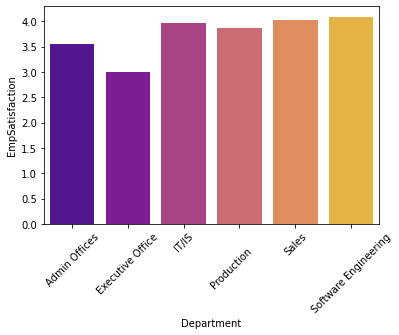

In [13]:
sns.barplot(x='Department',y='EmpSatisfaction',data=b)
plt.xticks(rotation=45)

**Executive Office is the most unSatisfaction Department**

**now let's see what raises the level of satisfaction**

<AxesSubplot:xlabel='EmpSatisfaction', ylabel='Salary'>

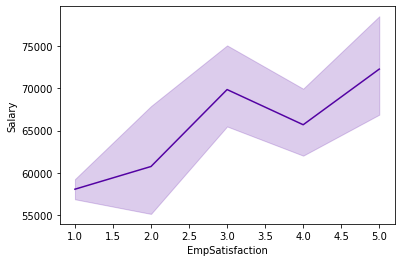

In [14]:
sns.lineplot(x = "EmpSatisfaction", y = "Salary", data = df)

**the salary  raises the level of satisfaction**

<AxesSubplot:xlabel='EngagementSurvey', ylabel='Salary'>

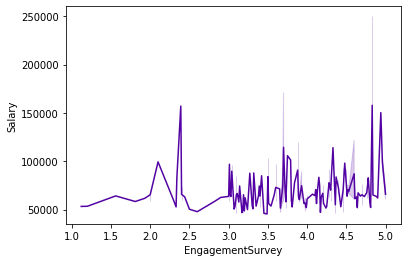

In [15]:
sns.lineplot(x = "EngagementSurvey", y = "Salary", data = df)

In [16]:
b=df.groupby('Department')['Salary'].mean().reset_index()
b

,Department,Salary
0,Admin Offices,71791.888889
1,Executive Office,250000.000000
2,IT/IS,97064.640000
3,Production,59953.545455
4,Sales,69061.258065
5,Software Engineering,94989.454545


**let's see are there areas of the company where pay is not equitable?**

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Admin Offices'),
  Text(1, 0, 'Executive Office'),
  Text(2, 0, 'IT/IS'),
  Text(3, 0, 'Production       '),
  Text(4, 0, 'Sales'),
  Text(5, 0, 'Software Engineering')])

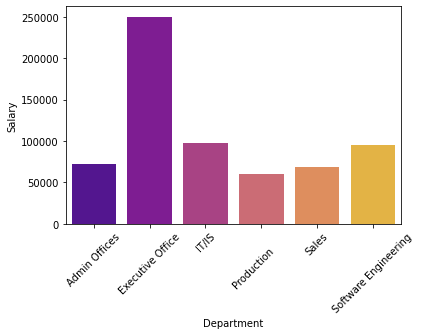

In [17]:
sns.barplot(x='Department',y='Salary',data=b)
plt.xticks(rotation=45)

**Although production is the biggest department has the lowest salary**

**let's see  best recruiting sources if we want to ensure a diverse organization**

In [18]:
fig = px.bar(df, x="RecruitmentSource",  color="RaceDesc" )
 
fig.show()

**indeed is the best**

In [19]:
df_num = df[['MarriedID', 'MaritalStatusID', 'GenderID','EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary','PerformanceScore','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','Absences','DaysLateLast30']]


                        MarriedID  MaritalStatusID  GenderID  EmpStatusID  \
MarriedID                1.000000         0.164044 -0.024199     0.085619   
MaritalStatusID          0.164044         1.000000 -0.030236     0.114630   
GenderID                -0.024199        -0.030236  1.000000    -0.032440   
EmpStatusID              0.085619         0.114630 -0.032440     1.000000   
DeptID                  -0.119932         0.012768 -0.038838     0.088711   
PerfScoreID             -0.058362         0.044693 -0.054915    -0.071208   
FromDiversityJobFairID  -0.012708         0.041117  0.031493     0.189025   
Salary                   0.026165        -0.070291  0.056097    -0.110912   
EngagementSurvey        -0.091178         0.033249 -0.036276     0.024305   
EmpSatisfaction         -0.126191         0.002068 -0.044603     0.010553   
SpecialProjectsCount     0.061278        -0.051093  0.087073    -0.166560   
Absences                 0.096086         0.018722 -0.004577     0.091834   

<AxesSubplot:>

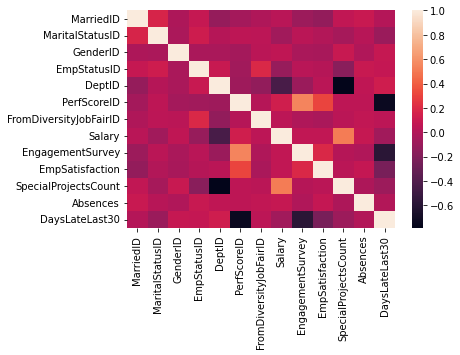

In [20]:
print(df_num.corr())
sns.heatmap(df_num.corr())